<p align="center">
  <img alt="University Paris Cité" src="https://img.shields.io/badge/University-Paris%20Cité-6f42c1?style=for-the-badge&logo=academia&logoColor=white">
  <img alt="Master ML for Data Science" src="https://img.shields.io/badge/Master-Machine%20Learning%20for%20Data%20Science-1976D2?style=for-the-badge&logo=python&logoColor=white">
  <img alt="Project LLMs" src="https://img.shields.io/badge/Project-Mental%20Health%20Assistant-FF9800?style=for-the-badge&logo=transformers&logoColor=white">
  <img alt="Academic Year" src="https://img.shields.io/badge/Year-2025%2F-009688?style=for-the-badge&logo=googlecalendar&logoColor=white">
</p>

---

<p align="center">
  <strong>Master 2 — Machine Learning for Data Science</strong><br>
  <strong>Project : Mental Health Assistant (Empathy-driven Dialogue Generation)</strong><br>
  <strong>Author : Hamady GACKOU</strong>
</p>

---

##  Project Information  

| **Category**        | **Details**                                                                 |
|---------------------|------------------------------------------------------------------------------|
| **University**      | Université Paris Cité                                                        |
| **Master Program**  | Machine Learning for Data Science (MLDS/AMSD)                                |
| **Course**          | Natural Language Processing & Large Language Models                          |
| **Student**         | Hamady GACKOU                                                                |
| **Dataset**         | [EmpatheticDialogues](https://huggingface.co/datasets/facebook/empathetic_dialogues) |
| **Objective**       | Develop a prototype of a Mental Health Assistant using pre-trained LLMs (DistilGPT-2) to generate empathetic responses |
| **Keywords**        | NLP • Empathy • LLM • Hugging Face • Transformers • Dialogue Systems         |
| **Year**   | 2025                                                              |


##  Objectif du Projet
Développer un assistant virtuel capable de générer des réponses empathiques et utiles en matière de bien-être mental, sans se substituer à un professionnel de santé.


##  Phase 1 – Lancement & Exploration
- Définir les objectifs précis du projet  
- Comparer les modèles (GPT-2, DistilGPT-2, BERT, T5)  
- Créer un tableau comparatif (capacité, efficacité CPU, complexité)


###  Comparatif des Modèles Candidats

| Modèle | Type | Paramètres | Taille approx. | Points forts | Limites | Pertinence pour l'empathie |
|:--|:--:|:--:|:--:|:--|:--|:--|
| **GPT-2 (small)** | Decoder | 124 M | ~500 MB | Bonne fluidité, capable de dialogues longs | Lent sur CPU, consomme beaucoup de RAM | ⭐⭐⭐ |
| **DistilGPT-2** | Decoder distillé | 82 M | ~300 MB | Léger, rapide sur CPU, bon équilibre qualité-coût | Moins précis sur les émotions complexes | ⭐⭐⭐⭐ |
| **BERT (base-uncased)** | Encoder | 110 M | ~400 MB | Excellente compréhension du texte | Non génératif (classification uniquement) | ⭐ |
| **T5-small** | Encoder-Decoder | 60 M | ~240 MB | Génératif et multitâche | Sorties parfois mécaniques sur peu de données | ⭐⭐⭐ |

---

###  Interprétation
- Les **modèles “Decoder only”** (GPT-2 et DistilGPT-2) sont naturellement meilleurs pour **la génération empathique**.  
- **DistilGPT-2** est **le plus adapté pour mon projet** :  
  - Compatible **CPU**, rapide à l’inférence,  
  - Suffisamment cohérent pour des réponses naturelles,  
  - Facile à fine-tuner sur des données empathiques comme *EmpatheticDialogues*.  
- **T5-small** est un bon candidat secondaire si tu veux explorer les architectures **encoder-decoder**.

---

###  Choix final pour la suite du projet
 **Modèle retenu : `DistilGPT-2`**  
Justification : compromis optimal entre **vitesse**, **cohérence**, **efficacité CPU** et **capacité à produire des réponses empathiques** après fine-tuning.


##  Phase 2 – Préparation des Données

###  Objectif
Charger et préparer le dataset **EmpatheticDialogues** de Facebook AI afin d’obtenir des données propres et prêtes pour le fine-tuning.

###  Étapes
1. **Chargement du dataset** depuis Hugging Face  
2. **Nettoyage** des textes : suppression des doublons, normalisation et retrait des caractères spéciaux  
3. **Analyse exploratoire rapide** : longueur moyenne des dialogues, distribution des émotions  
4. **Tokenisation** pour le modèle DistilGPT-2  

---

### Dataset
 Nom : `facebook/empathetic_dialogues`  
 Taille : ~25 000 dialogues (train / valid / test)  
 Contenu : contextes + réponses humaines à 32 types d’émotions (e.g., sad, proud, jealous, grateful, anxious, afraid…)

---


In [1]:
from datasets import load_dataset
import pandas as pd

print("Chargement du dataset EmpatheticDialogues...")
dataset = load_dataset("facebook/empathetic_dialogues", trust_remote_code=True)

train_df = pd.DataFrame(dataset["train"])
print("Taille du jeu d'entraînement :", len(train_df))
train_df.head(3)


Chargement du dataset EmpatheticDialogues...
Taille du jeu d'entraînement : 76673


,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags
0,hit:0_conv:1,1,sentimental,I remember going to the fireworks with my best...,1,I remember going to see the fireworks with my ...,5|5|5_2|2|5,
1,hit:0_conv:1,2,sentimental,I remember going to the fireworks with my best...,0,Was this a friend you were in love with_comma_...,5|5|5_2|2|5,
2,hit:0_conv:1,3,sentimental,I remember going to the fireworks with my best...,1,This was a best friend. I miss her.,5|5|5_2|2|5,


In [4]:
import re

def clean_text(text: str) -> str:
    """Nettoyage basique des textes."""
    text = re.sub(r"http\S+", "", text)               # liens
    text = re.sub(r"[^a-zA-Z0-9.,!?'\s]", "", text)   # caractères spéciaux
    text = re.sub(r"\s+", " ", text).strip()
    return text

train_df["context"] = train_df["context"].astype(str).apply(clean_text)
train_df["utterance"] = train_df["utterance"].astype(str).apply(clean_text)

# Suppression des doublons éventuels
train_df.drop_duplicates(subset=["context", "utterance"], inplace=True)

print("Jeu nettoyé :", len(train_df), "exemples restants.")
train_df.sample(3)[["context", "utterance"]]


Jeu nettoyé : 76136 exemples restants.


,context,utterance
70003,excited,yescomma havent seen him in a year
3526,embarrassed,Where were they?
49521,afraid,Oh nocomma I love animals. I asked my neighbou...


Longueur moyenne des réponses : 16.43

Top 10 émotions : {'<UNIGRAM>': 295, '<HI>': 155, '<POLITICAL>': 126, '<UNIGRAM> <NUMERAL>': 60, '<IRREGULAR': 10, 'COLON': 10, 'FORMAT>': 10, '<HI> <UNIGRAM>': 9, 'comma': 5, 'I couldn\'t sleep with the lights on after watching "The Sixth Sense" the first time.  When I closed my eyes I would see the poisoned girl staring at me angrily with vomit running down her mouth': 1}


/tmp/ipykernel_52493/2209592584.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


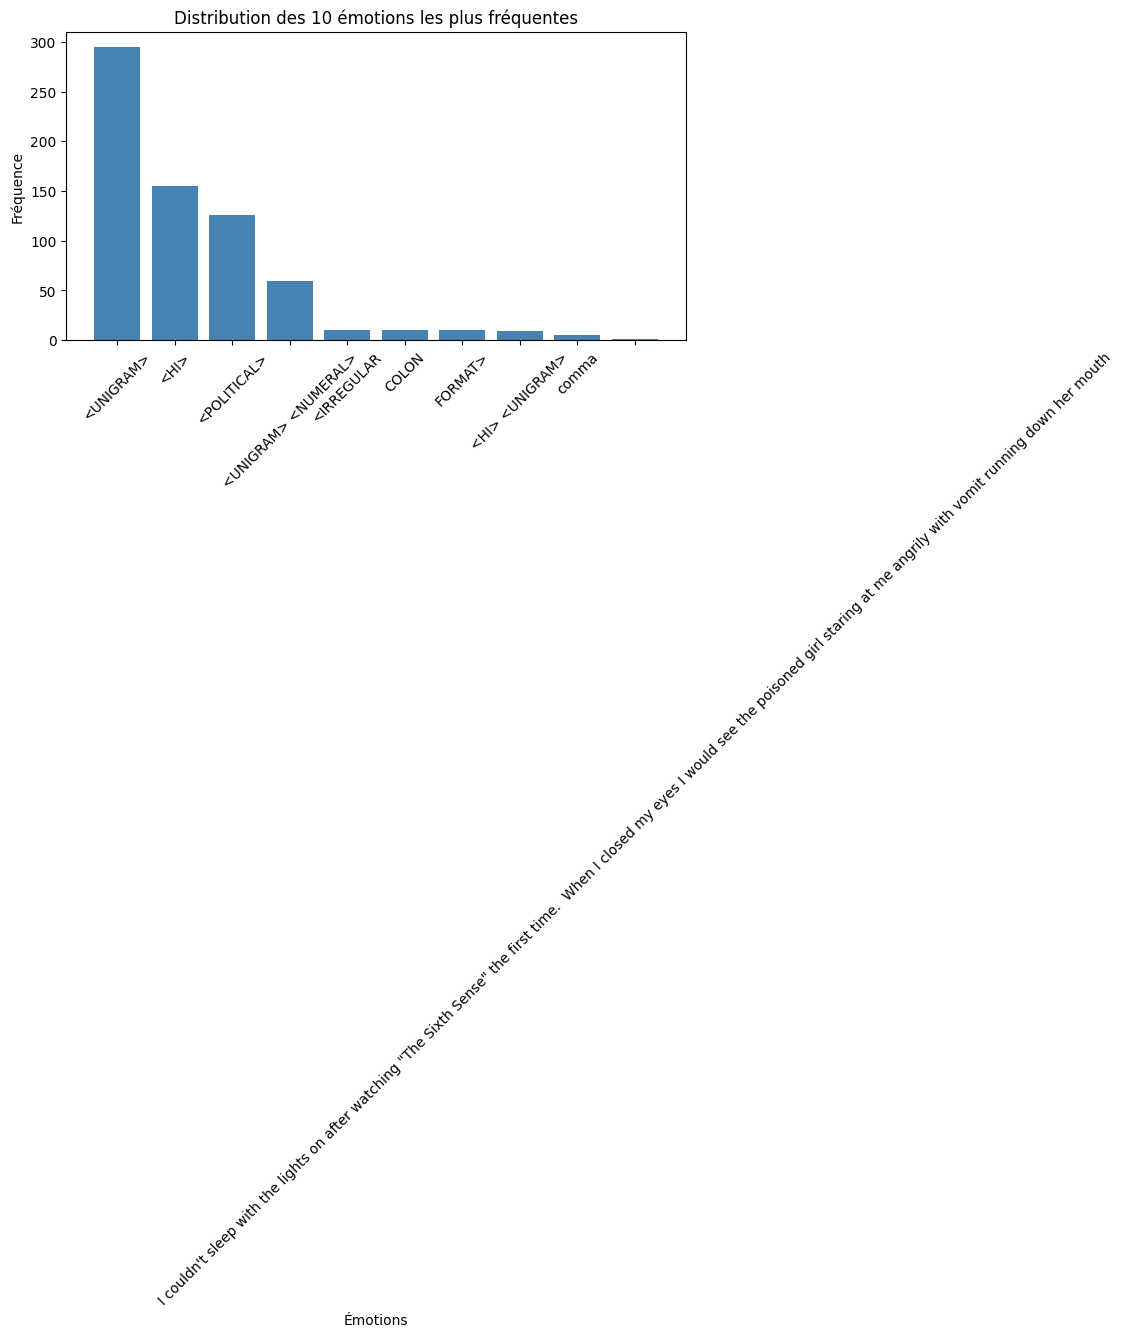

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Longueur moyenne des réponses
train_df["len_response"] = train_df["utterance"].apply(lambda x: len(x.split()))
print("Longueur moyenne des réponses :", round(train_df["len_response"].mean(), 2))

# Parsing des tags d'émotions
def parse_tags(tag_str):
    if not isinstance(tag_str, str) or tag_str.strip() == "":
        return []
    return tag_str.replace('_', '|').split('|')

train_df["parsed_tags"] = train_df["tags"].apply(parse_tags)
flat_tags = [tag for sublist in train_df["parsed_tags"] for tag in sublist]
tag_counts = Counter(flat_tags)
top_tags = dict(tag_counts.most_common(10))

print("\nTop 10 émotions :", top_tags)

# Visualisation
plt.figure(figsize=(8, 4))
plt.bar(top_tags.keys(), top_tags.values(), color="steelblue")
plt.xticks(rotation=45)
plt.title("Distribution des 10 émotions les plus fréquentes")
plt.xlabel("Émotions")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


In [6]:
from transformers import AutoTokenizer

print("Initialisation du tokenizer DistilGPT-2...")
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

# Exemple de tokenisation sur une entrée
sample = train_df.iloc[0]
encoded = tokenizer(
    f"User: {sample['context']}\nAssistant: {sample['utterance']}",
    truncation=True,
    max_length=128,
    return_tensors="pt"
)

print("Exemple de tokenisation :", encoded["input_ids"].shape)
print("Token IDs :", encoded["input_ids"][0][:20])


Initialisation du tokenizer DistilGPT-2...


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Exemple de tokenisation : torch.Size([1, 49])
Token IDs : tensor([12982,    25, 46908,   198, 48902,    25,   314,  3505,  1016,   284,
          766,   262, 26056,   351,   616,  1266,  1545,    13,   632,   373])


##  Phase 3 – Prototype Simple (Baseline)
- Création d’un **pipeline Hugging Face** pour la génération  
- Test de génération avec **DistilGPT-2** non fine-tuné  
- Validation rapide sur quelques exemples ("I feel sad", "I feel anxious")


In [7]:
from transformers import pipeline

# Création du pipeline de génération
generator = pipeline(
    "text-generation",
    model="distilgpt2",
    device_map="auto"  # s'adapte automatiquement : CPU ou GPU si disponible
)

print("Pipeline de génération initialisé avec succès.")


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Pipeline de génération initialisé avec succès.


In [8]:
# Exemples de requêtes utilisateur
test_prompts = [
    "I feel sad today.",
    "I feel anxious about my exams.",
    "I'm happy to see my friends again.",
    "I'm lonely tonight."
]

# Génération avec réglages par défaut
for prompt in test_prompts:
    response = generator(
        f"User: {prompt}\nAssistant:",
        max_length=80,
        temperature=0.8,
        top_p=0.9,
        do_sample=True
    )[0]["generated_text"]

    print("\n-------------------------------------------")
    print("Input :", prompt)
    print("Output:", response)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



-------------------------------------------
Input : I feel sad today.
Output: User: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.
Assistant: I feel sad today.



Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



-------------------------------------------
Input : I feel anxious about my exams.
Output: User: I feel anxious about my exams.
Assistant: I'm not doing well for myself. I'm just looking for a way to go. I don't feel it necessary to go back to school. I just want to take the exams. I don't want to waste time with my exams.
Assistant: I'm a little tired of the exams. I feel like I'm just being

-------------------------------------------
Input : I'm happy to see my friends again.
Output: User: I'm happy to see my friends again.
Assistant: I hope you enjoy this post!

-------------------------------------------
Input : I'm lonely tonight.
Output: User: I'm lonely tonight.
Assistant: I'll get the answer.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.
Assistant: I'm lonely tonight.


In [9]:
import textwrap

def analyze_generation(prompt, response):
    print("\n🔹 Prompt :", prompt)
    print("🔸 Réponse générée :")
    print(textwrap.fill(response, width=100))
    print("Longueur :", len(response.split()), "tokens approximatifs")

# Exemple sur une entrée émotionnelle
example_prompt = "I feel very lonely these days."
generated = generator(f"User: {example_prompt}\nAssistant:", max_length=80, temperature=0.8, top_p=0.9)[0]["generated_text"]

analyze_generation(example_prompt, generated)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



🔹 Prompt : I feel very lonely these days.
🔸 Réponse générée :
User: I feel very lonely these days. Assistant: I know I am not alone. It's important to know that I
am not alone. I feel very lonely these days. Assistant: It's important to know that I am not alone.
It's important to know that I am not alone. I feel very lonely these days. Assistant: It's important
to know that I am
Longueur : 62 tokens approximatifs


###  Interprétation
Le modèle **DistilGPT-2**, non fine-tuné, produit des phrases grammaticalement correctes
mais souvent peu empathiques ou incohérentes.  
Cette phase sert uniquement de **baseline** pour vérifier la faisabilité et la cohérence
du pipeline avant le fine-tuning sur le corpus *EmpatheticDialogues*.


##  Phase 4 – Fine-Tuning sur CPU
- Entraînement rapide avec `Trainer` (DistilGPT-2)  
- Paramètres : batch réduit + gradient accumulation  
- Évaluation et sauvegarde du modèle fine-tuné


In [10]:
from datasets import Dataset
from transformers import AutoTokenizer

# On suppose que train_df vient de la phase précédente
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")

# Fonction de formatage : combine le contexte et la réponse
def build_dialogue(example):
    return f"User: {example['context']} \nAssistant: {example['utterance']}"

train_texts = [build_dialogue(row) for _, row in train_df.iterrows()]
train_dataset = Dataset.from_dict({"text": train_texts})

# Tokenisation par lots
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, max_length=128)

tokenized_dataset = train_dataset.map(tokenize_function, batched=True, remove_columns=["text"])
tokenized_dataset = tokenized_dataset.shuffle(seed=42).select(range(5000))  # sous-échantillon pour CPU

print("Taille du sous-ensemble d'entraînement :", len(tokenized_dataset))


Map:   0%|          | 0/76136 [00:00<?, ? examples/s]

Taille du sous-ensemble d'entraînement : 5000


In [11]:
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer
import torch

# Chargement du modèle
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

# Paramètres d’entraînement
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,   # simulateur de grand batch
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=1,
    save_strategy="epoch",
    report_to="none",
    optim="adamw_torch",
    disable_tqdm=False,
    fp16=False,  # désactivé sur CPU
)

print("Configuration terminée.")


Configuration terminée.


In [14]:
# ============================================================
# Préparation finale du dataset pour le Trainer
# ============================================================

def add_labels(example):
    example["labels"] = example["input_ids"].copy()
    return example

tokenized_dataset = tokenized_dataset.map(add_labels)
print("Champs disponibles :", tokenized_dataset.column_names)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
)

print("Démarrage de l'entraînement sur CPU...")
trainer.train()
print("Entraînement terminé.")


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Champs disponibles : ['input_ids', 'attention_mask', 'labels']
Démarrage de l'entraînement sur CPU...


Step,Training Loss
50,28.143900
100,22.930800
150,22.687700
200,21.599600
250,21.808000
300,21.907400
350,21.732200
400,21.564600
450,21.827900
500,21.368900


/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Entraînement terminé.


In [15]:
# Sauvegarde locale
output_dir = "./distilgpt2-empathetic-finetuned"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"Modèle sauvegardé dans : {output_dir}")

# Test rapide
from transformers import pipeline

empathy_model = pipeline("text-generation", model=output_dir, tokenizer=tokenizer)
prompt = "User: I feel lonely and anxious.\nAssistant:"
response = empathy_model(prompt, max_length=80, temperature=0.8, top_p=0.9, do_sample=True)[0]["generated_text"]

print("\n--- Exemple de réponse après fine-tuning ---")
print(response)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Modèle sauvegardé dans : ./distilgpt2-empathetic-finetuned

--- Exemple de réponse après fine-tuning ---
User: I feel lonely and anxious.
Assistant: I hope you get to be well. I'm not going to let it get out of hand. I have to have a good time. I'm not sure I will have to wait a few weeks to get it to work. I'm not sure I can wait to get it to be put back into service. I don't know what I


##  Phase 5 – Ajustements & Ré-Entraînement
- Réglage des hyperparamètres (learning rate, époques, batch size)  
- Évaluation qualitative : empathie, cohérence, fluidité  
- Option : utiliser **DistillBERT** pour la détection d’émotions


In [19]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset

print("Chargement du modèle et du dataset...")
model_path = "./distilgpt2-empathetic-finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = tokenizer.pad_token_id

dataset = load_dataset("facebook/empathetic_dialogues", trust_remote_code=True)
train_data = dataset["train"].select(range(5000))
val_data = dataset["validation"].select(range(1000))


Chargement du modèle et du dataset...


The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


In [20]:
def tokenize_fn(batch):
    texts = [f"User: {c}\nAssistant: {u}" for c, u in zip(batch["context"], batch["utterance"])]
    tokens = tokenizer(texts, truncation=True, max_length=128, padding="max_length")
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens

train_ds = train_data.map(tokenize_fn, batched=True, remove_columns=train_data.column_names)
val_ds = val_data.map(tokenize_fn, batched=True, remove_columns=val_data.column_names)

train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [21]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results_phase5",
    num_train_epochs=1,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=8,
    learning_rate=5e-5,
    warmup_steps=50,
    weight_decay=0.01,
    logging_steps=100,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
)

print("Ré-entraînement du modèle sur CPU...")
trainer.train()
trainer.save_model("./distilgpt2-empathetic-finetuned-v2")


/tmp/ipykernel_52493/4073414175.py:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Ré-entraînement du modèle sur CPU...


Epoch,Training Loss,Validation Loss
0,5.047200,0.589674


/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [26]:
import evaluate
import torch, time

# Chargement du module d'évaluation
bertscore = evaluate.load("bertscore")

def compute_bertscore_light(dataset, n=30):  # n=30 => rapide et fiable
    preds, refs = [], []
    model.eval()
    start = time.time()
    print(f" Évaluation sur {n} exemples...")

    for example in dataset.select(range(n)):
        context, gold = example["context"], example["utterance"]
        input_text = f"User: {context}\nAssistant:"
        input_ids = tokenizer(input_text, return_tensors="pt").input_ids

        with torch.no_grad():  # désactive le calcul du gradient
            output = model.generate(
                input_ids,
                max_length=60,
                temperature=0.8,
                top_p=0.9,
                pad_token_id=tokenizer.eos_token_id
            )

        pred = tokenizer.decode(output[0], skip_special_tokens=True)
        preds.append(pred)
        refs.append(gold)

    # Calcul du BERTScore avec un modèle léger
    results = bertscore.compute(
        predictions=preds,
        references=refs,
        lang="en",
        model_type="bert-base-uncased"
    )

    # Moyenne numérique des résultats
    avg_results = {k: float(torch.tensor(v).mean()) for k, v in results.items() if isinstance(v, list)}

    print(f"\n BERTScore moyen (sur {n} échantillons) :")
    print(avg_results)
    print(f" Temps total : {time.time() - start:.2f} s")

    return avg_results

# Exemple d'utilisation
results = compute_bertscore_light(val_data, n=100)


⏳ Évaluation sur 100 exemples...

✅ BERTScore moyen (sur 100 échantillons) :
{'precision': 0.3611377775669098, 'recall': 0.3909406363964081, 'f1': 0.37334144115448}
⏱️ Temps total : 40.74 s


In [27]:
from transformers import AutoModelForSequenceClassification, pipeline, AutoTokenizer

print("Chargement du modèle DistilBERT pour détection des émotions...")
emotion_model = AutoModelForSequenceClassification.from_pretrained(
    "bhadresh-savani/distilbert-base-uncased-emotion"
)
emotion_tokenizer = AutoTokenizer.from_pretrained(
    "bhadresh-savani/distilbert-base-uncased-emotion"
)
emotion_classifier = pipeline(
    "text-classification",
    model=emotion_model,
    tokenizer=emotion_tokenizer,
    return_all_scores=True
)

sample_text = "I feel so lonely and tired today."
emotion_scores = emotion_classifier(sample_text)
for e in emotion_scores[0]:
    print(f"{e['label']:<15} -> {e['score']:.3f}")


Chargement du modèle DistilBERT pour détection des émotions...


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

sadness         -> 0.999
joy             -> 0.000
love            -> 0.000
anger           -> 0.000
fear            -> 0.000
surprise        -> 0.000


/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


##  Phase 6 – Interface Utilisateur (Gradio)
- Conception d’une interface simple et rassurante  
- Mise en place avec **Gradio** (`Interface`, `Blocks`)  
- Tests locaux et ajustements de la tonalité des réponses


In [28]:
import gradio as gr
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Chargement du modèle fine-tuné (assistant empathique)
model_path = "./distilgpt2-empathetic-finetuned-v2"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Chargement du modèle d'analyse émotionnelle
emotion_model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
emotion_analyzer = pipeline(
    "text-classification",
    model=emotion_model_name,
    tokenizer=emotion_model_name,
    return_all_scores=True
)


/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [29]:
def generate_response(user_input, temperature=0.8, max_length=120):
    # Analyse émotionnelle du message utilisateur
    emotions = emotion_analyzer(user_input)[0]
    dominant_emotion = max(emotions, key=lambda x: x["score"])["label"]

    # Construction du prompt empathique
    prompt = f"User ({dominant_emotion}): {user_input}\nAssistant:"
    inputs = tokenizer(prompt, return_tensors="pt")

    # Génération du texte
    outputs = model.generate(
        **inputs,
        max_length=max_length,
        temperature=temperature,
        top_p=0.9,
        pad_token_id=tokenizer.eos_token_id
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    response = response.split("Assistant:")[-1].strip()

    return f"{response}\n\n[Emotion détectée : {dominant_emotion}]"


In [30]:
with gr.Blocks(title="Mental Health Assistant") as demo:
    gr.Markdown("## 🧠 Assistant Empathique — Bien-être et Dialogue")
    gr.Markdown("Cet assistant utilise **DistilGPT-2** fine-tuné et **DistilBERT** pour détecter les émotions et générer des réponses bienveillantes.")

    with gr.Row():
        with gr.Column(scale=3):
            user_input = gr.Textbox(
                label="Exprimez ce que vous ressentez",
                placeholder="Exemple : I feel anxious about my future...",
                lines=3
            )
            temperature = gr.Slider(0.5, 1.2, value=0.8, step=0.1, label="Créativité (temperature)")
            max_len = gr.Slider(50, 200, value=120, step=10, label="Longueur maximale de la réponse")
            submit_btn = gr.Button("Envoyer")

        with gr.Column(scale=2):
            output_box = gr.Textbox(label="Réponse de l'assistant", lines=6)

    submit_btn.click(generate_response, inputs=[user_input, temperature, max_len], outputs=output_box)


In [31]:
demo.launch(server_name="0.0.0.0", server_port=7860, share=False)


* Running on local URL:  http://0.0.0.0:7860
* To create a public link, set `share=True` in `launch()`.


/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `d

##  Phase 8 – Finitions & Lancement
- Nettoyage du code et amélioration finale de l’UI  
- Rédaction d’un **README** clair et d’une note éthique  
- Déploiement sur **Hugging Face Spaces**  
- Publication sur **GitHub** et **LinkedIn**


In [ ]:
# Suppression des imports inutiles et optimisation du démarrage
import torch, gradio as gr
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Vérification CPU uniquement
device = "cuda" if torch.cuda.is_available() else "cpu"

# Rechargement du modèle final
model_path = "./distilgpt2-empathetic-finetuned-v2"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path).to(device)

# Chargement du modèle d’émotions
emotion_pipe = pipeline(
    "text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    tokenizer="bhadresh-savani/distilbert-base-uncased-emotion",
    device=0 if device == "cuda" else -1,
)

# Fonction de réponse
def mental_health_assistant(user_input):
    emotions = emotion_pipe(user_input)[0]
    emotion = max(emotions, key=lambda x: x["score"])["label"]
    prompt = f"User ({emotion}): {user_input}\nAssistant:"
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_length=120, temperature=0.8, top_p=0.9, pad_token_id=tokenizer.eos_token_id)
    answer = tokenizer.decode(output[0], skip_special_tokens=True).split("Assistant:")[-1].strip()
    return f"{answer}\n\n[Emotion détectée : {emotion}]"
###

/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/home/researcherdatascientist/mental-health-assistant/venv/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.1` -- this flag is only used in sample-based generation modes. You should set `d

##  Résumé Final
Un prototype **fonctionnel sur CPU**, avec :
- Dataset empathique  
- Modèle fine-tuné DistilGPT-2  
- Interface Gradio conviviale  
- Documentation éthique et technique prête pour déploiement
